## Cargamos las Librerías:

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

## Cargamos el Token:

In [3]:
load_dotenv(dotenv_path='/home/barea/INEGI_API/.env')

token = os.getenv("INEGI_TOKEN")

In [4]:
print(token)

0f3e8a33-8776-d1b7-2615-657d9245b616


## ID del Indicador:

In [5]:
serie_id = "441494,441505,441515"

## EndPoint de Consulta:

In [6]:
url = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{serie_id}/es/0700/false/BIE/2.0/{token}?type=json"

In [7]:
print(url)

https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/441494,441505,441515/es/0700/false/BIE/2.0/0f3e8a33-8776-d1b7-2615-657d9245b616?type=json


## Hacemos la Solicitud:

In [8]:
response = requests.get(url)
data = response.json()

In [9]:
data

{'Header': {'Name': 'Datos compactos BIE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '441494',
   'FREQ': '3',
   'TOPIC': '11400340030000200090',
   'UNIT': '99',
   'UNIT_MULT': None,
   'NOTE': '2279',
   'SOURCE': '92',
   'LASTUPDATE': '30/04/2025 03:43:57 p. m.',
   'STATUS': None,
   'OBSERVATIONS': [{'TIME_PERIOD': '2023',
     'OBS_VALUE': '53253307.601',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2022',
     'OBS_VALUE': '48558677.725',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2021',
     'OBS_VALUE': '39804690.857',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '92',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2020',
     'OBS_VALUE': '42970133.093',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
  

## Extraemos los Datos:

In [10]:
serie_ingreso_brutos = data['Series'][0]['OBSERVATIONS']
serie_egresos_brutos = data['Series'][1]['OBSERVATIONS']
serie_deuda_publica = data['Series'][2]['OBSERVATIONS']

In [11]:
años = [obs['TIME_PERIOD'] for obs in serie_ingreso_brutos]
val_ingresos_brutos = [float(obs['OBS_VALUE']) for obs in serie_ingreso_brutos]
val_egresos_brutos = [float(obs['OBS_VALUE']) for obs in serie_egresos_brutos]
val_deuda_publica = [float(obs['OBS_VALUE']) for obs in serie_deuda_publica]

## Creamos el DataFrame:

In [12]:
data_finanzas = pd.DataFrame({
    'Año': años,
    'Ingresos_brutos': val_ingresos_brutos,
    'Egresos_brutos': val_egresos_brutos,
    'Deuda_publica': val_deuda_publica
})

In [13]:
data_finanzas

,Año,Ingresos_brutos,Egresos_brutos,Deuda_publica
0,2023,5.325331e+07,5.325331e+07,1280960.196
1,2022,4.855868e+07,4.855868e+07,1424115.983
2,2021,3.980469e+07,3.980469e+07,1351328.178
3,2020,4.297013e+07,4.297013e+07,744791.587
4,2019,3.884772e+07,3.884772e+07,644628.136
5,2018,3.980005e+07,3.980005e+07,705545.572
6,2017,3.956045e+07,3.956045e+07,1042975.118
7,2016,3.564327e+07,3.564327e+07,635395.756
8,2015,3.454824e+07,3.454824e+07,1428341.768
9,2014,3.135682e+07,3.135682e+07,545414.882


In [14]:
data_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              35 non-null     object 
 1   Ingresos_brutos  35 non-null     float64
 2   Egresos_brutos   35 non-null     float64
 3   Deuda_publica    35 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [15]:
data_finanzas['Año'] = data_finanzas['Año'].astype(int)

In [16]:
data_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              35 non-null     int64  
 1   Ingresos_brutos  35 non-null     float64
 2   Egresos_brutos   35 non-null     float64
 3   Deuda_publica    35 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


In [17]:
sns.set_style("white")
sns.set_context("notebook")
plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'stix',
    'font.serif': 'Times New Roman',
    'figure.figsize': (11, 9.4),
    'axes.edgecolor': 'white',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 20,
    'axes.titlecolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

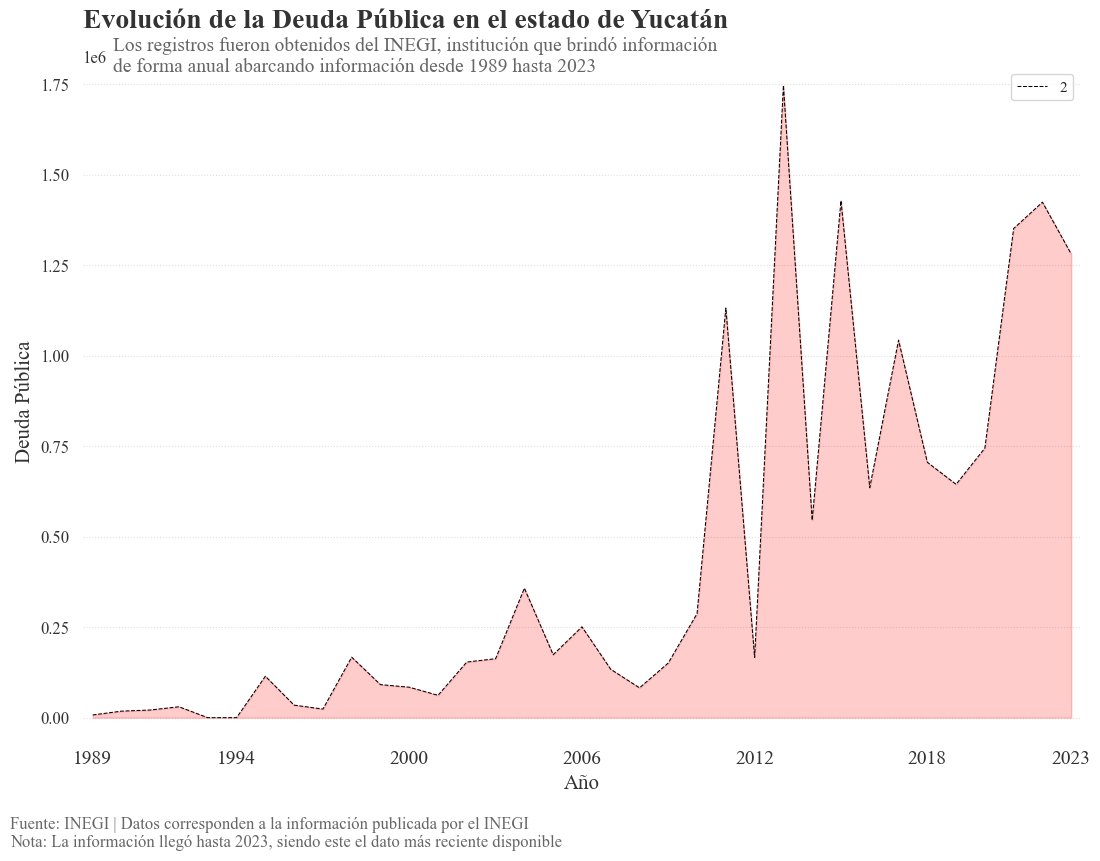

In [19]:
fig, ax = plt.subplots()

(
    data_finanzas
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Deuda_publica',
            linestyle = 'dashed',
            color = 'black',
            size = 2
        )
    )
)

plt.fill_between(
    data_finanzas['Año'],
    data_finanzas['Deuda_publica'],
    color='red',
    alpha=0.2
)

ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Evolución de la Deuda Pública en el estado de Yucatán',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.03, 0.992, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1989 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)


plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: La información llegó hasta 2023, siendo este el dato más reciente disponible',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Año', size=15)
plt.xticks([1989, 1994, 2000, 2006, 2012, 2018, 2023])
plt.ylabel('Deuda Pública', size=15)
sns.despine(left=True, bottom=True)
plt.show()

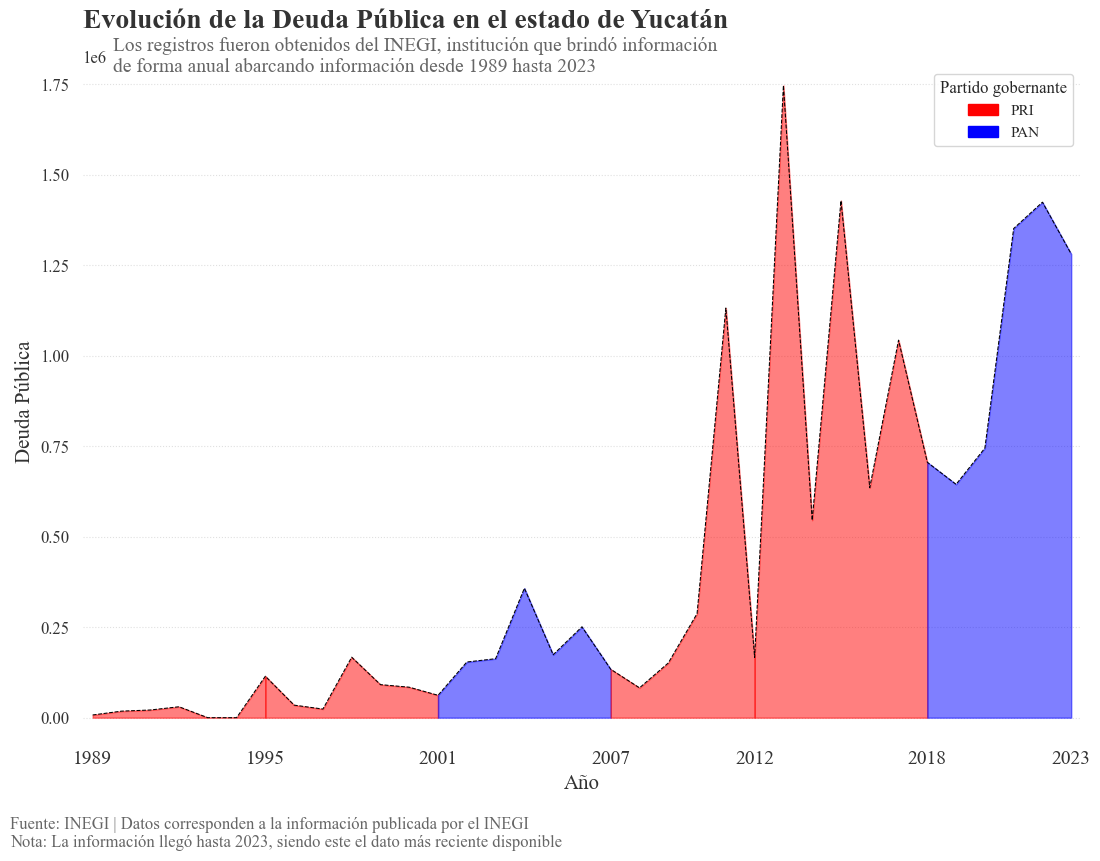

In [20]:
fig, ax = plt.subplots()

(
    data_finanzas
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Deuda_publica',
            linestyle = 'dashed',
            color = 'black',
            size = 2,
            ax = ax,
            legend = False
        )
    )
)


sexenios_colores = {
    (1989, 1995): 'red',
    (1995, 2001): 'red',
    (2001, 2007): 'blue',
    (2007, 2012): 'red',
    (2012, 2018): 'red',
    (2018, 2023): 'blue'
}

for (inicio, fin), color in sexenios_colores.items():
    df_sexenio = data_finanzas[(data_finanzas['Año'] >= inicio) & (data_finanzas['Año'] <= fin)]
    plt.fill_between(
        df_sexenio['Año'],
        df_sexenio['Deuda_publica'],
        color=color,
        alpha=0.5
    )


legend_patches = [
    mpatches.Patch(color='red', label='PRI'),
    mpatches.Patch(color='blue', label='PAN')
]
ax.legend(handles=legend_patches, title='Partido gobernante')


ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Evolución de la Deuda Pública en el estado de Yucatán',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.03, 0.992, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1989 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: La información llegó hasta 2023, siendo este el dato más reciente disponible',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Año', size=15)
plt.xticks([1989, 1995, 2001, 2007, 2012, 2018, 2023])
plt.ylabel('Deuda Pública', size=15)
sns.despine(left=True, bottom=True)
plt.show()

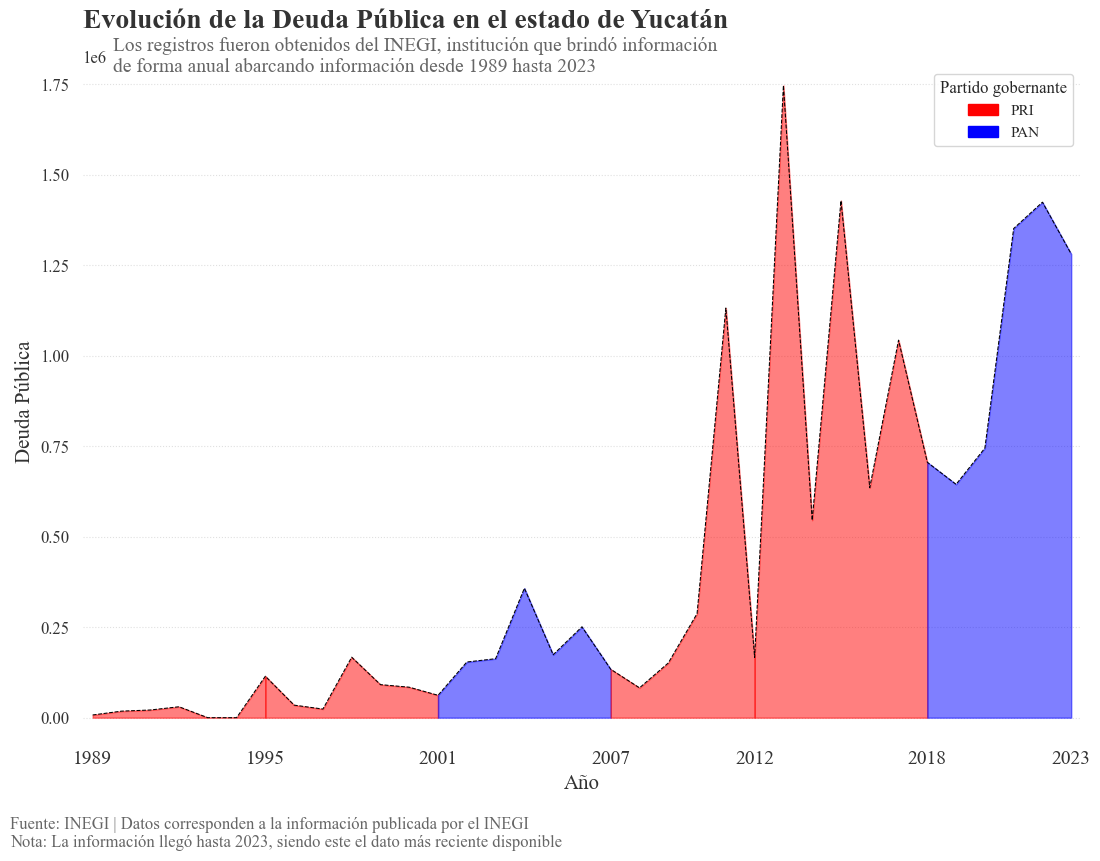

In [21]:
fig, ax = plt.subplots()


(
    data_finanzas
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Deuda_publica',
            linestyle = 'dashed',
            color = 'black',
            size = 2,
            ax = ax,
            legend = False
        )
    )
)



sexenios_colores = {
    (1989, 1995): 'red',
    (1995, 2001): 'red',
    (2001, 2007): 'blue',
    (2007, 2012): 'red',
    (2012, 2018): 'red',
    (2018, 2023): 'blue'
}

for (inicio, fin), color in sexenios_colores.items():
    df_sexenio = data_finanzas[(data_finanzas['Año'] >= inicio) & (data_finanzas['Año'] <= fin)]
    plt.fill_between(
        df_sexenio['Año'],
        df_sexenio['Deuda_publica'],
        color=color,
        alpha=0.5
    )


legend_patches = [
    mpatches.Patch(color='red', label='PRI'),
    mpatches.Patch(color='blue', label='PAN')
]
ax.legend(handles=legend_patches, title='Partido gobernante')


ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Evolución de la Deuda Pública en el estado de Yucatán',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.03, 0.992, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1989 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: La información llegó hasta 2023, siendo este el dato más reciente disponible',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Año', size=15)
plt.xticks([1989, 1995, 2001, 2007, 2012, 2018, 2023])
plt.ylabel('Deuda Pública', size=15)
sns.despine(left=True, bottom=True)
plt.show()

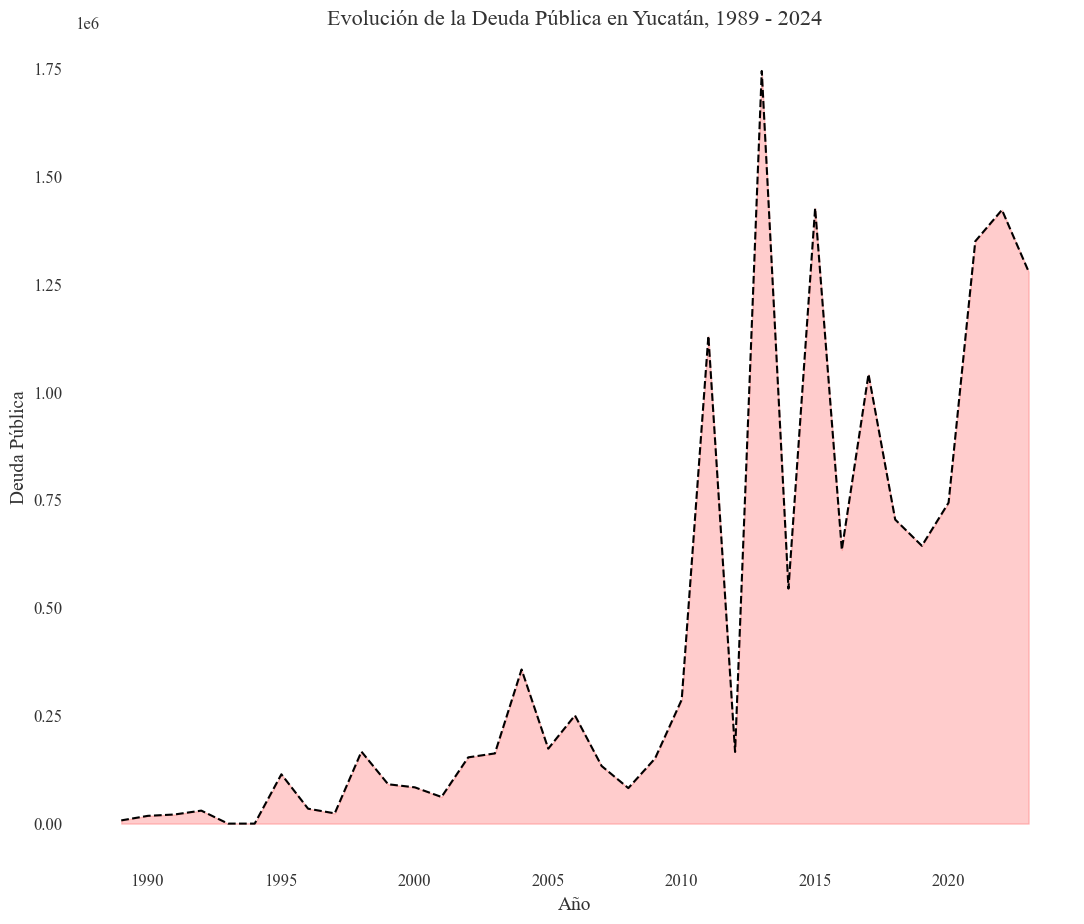

In [22]:
(
    data_finanzas
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Deuda_publica',
            linestyle = 'dashed',
            color = 'black'
        )
    )
)

plt.fill_between(
    data_finanzas['Año'],
    data_finanzas['Deuda_publica'],
    color='red',
    alpha=0.2
)

plt.title('Evolución de la Deuda Pública en Yucatán, 1989 - 2024', size = 16)
plt.xlabel('Año')
plt.ylabel('Deuda Pública')
plt.tight_layout()
plt.show()